# Create project

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import dates as mdates

#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

#wide-form
import os
# set random seed
SEED = 321
np.random.seed(SEED)

In [2]:
# load data
#load data
filename = 'City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv'
df = pd.read_csv(filename)
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22462,236350,28439,Palisades,city,TX,TX,"Amarillo, TX",Randall County,NaN,NaN,...,198490.0,198467.0,196420.0,192002.0,191634.0,189383.0,191134.0,191343.0,192384.0,192110.0
22463,40403,28439,Port Mansfield,city,TX,TX,"Raymondville, TX",Willacy County,NaN,NaN,...,229251.0,232984.0,238245.0,240154.0,242470.0,243119.0,249098.0,255572.0,261910.0,264685.0
22464,54740,28439,Tribes Hill,city,NY,NY,"Amsterdam, NY",Montgomery County,53380.0,53662.0,...,132490.0,134951.0,137470.0,137430.0,137413.0,137615.0,138908.0,140096.0,141573.0,142438.0
22465,249186,28439,Derby Center,city,VT,VT,NaN,Orleans County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,258191.0,261607.0,264571.0,266255.0


In [3]:
## create new dataframe with four largest cities
city_df=df[df['SizeRank']<4]
city_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [4]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 8.8+ KB


In [27]:
# look at missing values
city_df.isna().sum()

RegionID      0
SizeRank      0
RegionName    0
RegionType    0
StateName     0
             ..
2022-05-31    0
2022-06-30    0
2022-07-31    0
2022-08-31    0
2022-09-30    0
Length: 281, dtype: int64

# Part 1
- melt the data
- make datetime index
- resample with month grouped by city

In [5]:
## First 3 columns are id coluimns
id_vars = city_df.columns[:8]
id_vars

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName'],
      dtype='object')

In [6]:
## Melt the  data 
long_city = pd.melt(city_df, id_vars=id_vars)
long_city

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,variable,value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [7]:
long_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1092 non-null   int64  
 1   SizeRank    1092 non-null   int64  
 2   RegionName  1092 non-null   object 
 3   RegionType  1092 non-null   object 
 4   StateName   1092 non-null   object 
 5   State       1092 non-null   object 
 6   Metro       1092 non-null   object 
 7   CountyName  1092 non-null   object 
 8   variable    1092 non-null   object 
 9   value       1087 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 85.4+ KB


In [8]:
## Set the var_name  as "Date" and the value_name was " Value"
long_city = pd.melt(city_df,id_vars=id_vars, var_name='Date', 
                      value_name="Value")
long_city

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [9]:
long_city['Value'].describe()

count      1087.000000
mean     363508.656854
std      205122.535553
min      108834.000000
25%      192094.500000
50%      293193.000000
75%      526889.500000
max      992630.000000
Name: Value, dtype: float64

In [10]:
## Now make Date column datetime 
long_city['Date'] = pd.to_datetime( long_city["Date"])
long_city

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [11]:
## Set Date as index
long_city = long_city.set_index('Date')
long_city

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Value
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0
...,...,...,...,...,...,...,...,...,...
2022-08-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,315587.0
2022-09-30,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,781622.0
2022-09-30,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,966595.0


In [12]:
long_city.groupby("RegionName").resample("M").asfreq("M")

RegionID  SizeRank RegionName RegionType StateName  \
RegionName Date                                                             
Chicago    2000-01-31     17426         3    Chicago       city        IL   
           2000-02-29     17426         3    Chicago       city        IL   
           2000-03-31     17426         3    Chicago       city        IL   
           2000-04-30     17426         3    Chicago       city        IL   
           2000-05-31     17426         3    Chicago       city        IL   
...                         ...       ...        ...        ...       ...   
New York   2022-05-31      6181         0   New York       city        NY   
           2022-06-30      6181         0   New York       city        NY   
           2022-07-31      6181         0   New York       city        NY   
           2022-08-31      6181         0   New York       city        NY   
           2022-09-30      6181         0   New York       city        NY   

                      State                                  Metro  \
RegionName Date                                                      
Chicago    2000-01-31    IL     Chicago-Naperville-Elgin, IL-IN-WI   
           2000-02-29    IL     Chicago-Naperville-Elgin, IL-IN-WI   
           2000-03-31    IL     Chicago-Naperville-Elgin, IL-IN-WI   
           2000-04-30    IL     Chicago-Naperville-Elgin, IL-IN-WI   
           2000-05-31    IL     Chicago-Naperville-Elgin, IL-IN-WI   
...                     ...                                    ...   
New York   2022-05-31    NY  New York-Newark-Jersey City, NY-NJ-PA   
           2022-06-30    NY  New York-Newark-Jersey City, NY-NJ-PA   
           2022-07-31    NY  New York-Newark-Jersey City, NY-NJ-PA   
           2022-08-31    NY  New York-Newark-Jersey City, NY-NJ-PA   
           2022-09-30    NY  New York-Newark-Jersey City, NY-NJ-PA   

                          CountyName     Value  
RegionName Date                                 
Chicago    2000-01-31    Cook County  166139.0  
           2000-02-29    Cook County  166536.0  
           2000-03-31    Cook County  167368.0  
           2000-04-30    Cook County  168826.0  
           2000-05-31    Cook County  170499.0  
...                              ...       ...  
New York   2022-05-31  Queens County  768797.0  
           2022-06-30  Queens County  773944.0  
           2022-07-31  Queens County  777692.0  
           2022-08-31  Queens County  779960.0  
           2022-09-30  Queens County  781622.0  

[1092 rows x 9 columns]

In [13]:
# resample by month and  group by city
city_rs =long_city.groupby("RegionName").resample("M").asfreq("M")

In [14]:
city_rs.head()

RegionID  SizeRank RegionName RegionType StateName  \
RegionName Date                                                             
Chicago    2000-01-31     17426         3    Chicago       city        IL   
           2000-02-29     17426         3    Chicago       city        IL   
           2000-03-31     17426         3    Chicago       city        IL   
           2000-04-30     17426         3    Chicago       city        IL   
           2000-05-31     17426         3    Chicago       city        IL   

                      State                               Metro   CountyName  \
RegionName Date                                                                
Chicago    2000-01-31    IL  Chicago-Naperville-Elgin, IL-IN-WI  Cook County   
           2000-02-29    IL  Chicago-Naperville-Elgin, IL-IN-WI  Cook County   
           2000-03-31    IL  Chicago-Naperville-Elgin, IL-IN-WI  Cook County   
           2000-04-30    IL  Chicago-Naperville-Elgin, IL-IN-WI  Cook County   
           2000-05-31    IL  Chicago-Naperville-Elgin, IL-IN-WI  Cook County   

                          Value  
RegionName Date                  
Chicago    2000-01-31  166139.0  
           2000-02-29  166536.0  
           2000-03-31  167368.0  
           2000-04-30  168826.0  
           2000-05-31  170499.0

In [15]:
#unstack the data
city_rs_unstacked = city_rs.unstack(0)
city_rs_unstacked

RegionID                              SizeRank                      \
RegionName  Chicago Houston Los Angeles New York  Chicago Houston Los Angeles   
Date                                                                            
2000-01-31    17426   39051       12447     6181        3       2           1   
2000-02-29    17426   39051       12447     6181        3       2           1   
2000-03-31    17426   39051       12447     6181        3       2           1   
2000-04-30    17426   39051       12447     6181        3       2           1   
2000-05-31    17426   39051       12447     6181        3       2           1   
...             ...     ...         ...      ...      ...     ...         ...   
2022-05-31    17426   39051       12447     6181        3       2           1   
2022-06-30    17426   39051       12447     6181        3       2           1   
2022-07-31    17426   39051       12447     6181        3       2           1   
2022-08-31    17426   39051       12447     6181        3       2           1   
2022-09-30    17426   39051       12447     6181        3       2           1   

                    RegionName           ...  \
RegionName New York    Chicago  Houston  ...   
Date                                     ...   
2000-01-31        0    Chicago  Houston  ...   
2000-02-29        0    Chicago  Houston  ...   
2000-03-31        0    Chicago  Houston  ...   
2000-04-30        0    Chicago  Houston  ...   
2000-05-31        0    Chicago  Houston  ...   
...             ...        ...      ...  ...   
2022-05-31        0    Chicago  Houston  ...   
2022-06-30        0    Chicago  Houston  ...   
2022-07-31        0    Chicago  Houston  ...   
2022-08-31        0    Chicago  Houston  ...   
2022-09-30        0    Chicago  Houston  ...   

                                         Metro  \
RegionName                         Los Angeles   
Date                                             
2000-01-31  Los Angeles-Long Beach-Anaheim, CA   
2000-02-29  Los Angeles-Long Beach-Anaheim, CA   
2000-03-31  Los Angeles-Long Beach-Anaheim, CA   
2000-04-30  Los Angeles-Long Beach-Anaheim, CA   
2000-05-31  Los Angeles-Long Beach-Anaheim, CA   
...                                        ...   
2022-05-31  Los Angeles-Long Beach-Anaheim, CA   
2022-06-30  Los Angeles-Long Beach-Anaheim, CA   
2022-07-31  Los Angeles-Long Beach-Anaheim, CA   
2022-08-31  Los Angeles-Long Beach-Anaheim, CA   
2022-09-30  Los Angeles-Long Beach-Anaheim, CA   

                                                    CountyName                 \
RegionName                               New York      Chicago        Houston   
Date                                                                            
2000-01-31  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2000-02-29  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2000-03-31  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2000-04-30  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2000-05-31  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
...                                           ...          ...            ...   
2022-05-31  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2022-06-30  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2022-07-31  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2022-08-31  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2022-09-30  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   

                                                  Value                        \
RegionName         Los Angeles       New York   Chicago   Houston Los Angeles   
Date                                                                            
2000-01-31  Los Angeles County  Queens County  166139.0  109068.0    234181.0   
2000-02-29  Los Angeles County  Queens Coun

#### Don't forget to unstack

# Part 2: Plot and Questions
#### Plot
 - Make sure to add a title and axis labels.
 - Reformat the y-axis ticks to use thousands of dollars with a "K" at the end. (e.g. "200K, 400K, etc")
     - Hint: use the FuncFormatter from matplotlib.
#### Questions
Answer the following 2 questions using pandas:
1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?
Hint: use either pd.IndexSlice or .unstack() to get the answer.
2) How much did the home values change from November 2008 to December 2008 (in dollars)?
Hint: you can use .diff() to calculate the change in values

## Plot

In [16]:
# function  for thousands

def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# Create the formatters
fmt_thous = mticks.FuncFormatter(thousands)

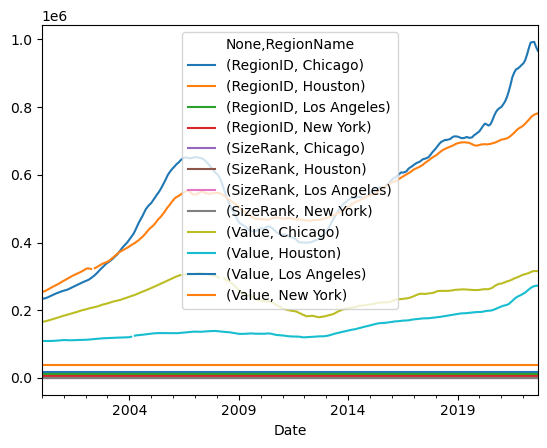

In [17]:
ax = city_rs_unstacked.plot();


In [18]:
# drop unneeded columns
city_rs_unstacked1 = city_rs_unstacked.drop(columns=['RegionID','SizeRank'])

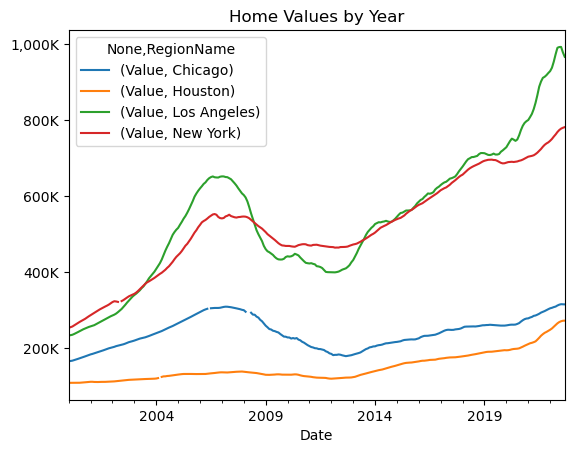

In [19]:
ax = city_rs_unstacked1.plot(title='Home Values by Year');
ax.yaxis.set_major_formatter(fmt_thous)


## Question 1

In [20]:
#use idmax to get city with max value
max_city_home = city_rs_unstacked['Value'].idxmax()
max_city_home

RegionName
Chicago       2022-07-31
Houston       2022-09-30
Los Angeles   2022-07-31
New York      2022-09-30
dtype: datetime64[ns]

In [24]:
max2008 = city_rs_unstacked['Value'].loc['2008'].copy()
max2008

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2008-01-31,300207.0,138208.0,603029.0,546538.0
2008-02-29,296063.0,137512.0,596635.0,546098.0
2008-03-31,NaN,136795.0,586065.0,544562.0
2008-04-30,NaN,136628.0,571226.0,541865.0
2008-05-31,293467.0,136228.0,554589.0,537685.0
2008-06-30,288495.0,135773.0,539622.0,533810.0
2008-07-31,288174.0,135392.0,524220.0,529211.0
2008-08-31,283199.0,134770.0,510520.0,525290.0
2008-09-30,280695.0,133932.0,500124.0,521347.0


In [31]:
max2008["Chicago"].idxmax()

Timestamp('2008-01-31 00:00:00', freq='M')

#### Which city had the highest home value at the end of 2008?
- New York

#### Which city had the lowest home value at the end of 2008?
- Houston

## Question 2

In [32]:
# Calculate the diff between November 2008 to Dec 2008
ts_diff = max2008.diff()
ts_diff

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2008-01-31,NaN,NaN,NaN,NaN
2008-02-29,-4144.0,-696.0,-6394.0,-440.0
2008-03-31,NaN,-717.0,-10570.0,-1536.0
2008-04-30,NaN,-167.0,-14839.0,-2697.0
2008-05-31,NaN,-400.0,-16637.0,-4180.0
2008-06-30,-4972.0,-455.0,-14967.0,-3875.0
2008-07-31,-321.0,-381.0,-15402.0,-4599.0
2008-08-31,-4975.0,-622.0,-13700.0,-3921.0
2008-09-30,-2504.0,-838.0,-10396.0,-3943.0


#### How much did the home values change in New York?
- The  home values dropped by 4,458.
#### How much did the home values change in Houston?
- The home values dropped by 964.00. 